In [3]:
import numpy as np

In [4]:
np.__version__

'1.21.2'

Up to this point we have been concerned mainly with tools to access and operate on
array data with NumPy. This section covers algorithms related to sorting values in
NumPy arrays. These algorithms are a favorite topic in introductory computer sci‐
ence courses: if you’ve ever taken one, you probably have had dreams (or, depending
on your temperament, nightmares) about insertion sorts, selection sorts, merge sorts,
quick sorts, bubble sorts, and many, many more. All are means of accomplishing a
similar task: sorting the values in a list or array.

##### Fast Sorting in NumPy: np.sort and np.argsort

Although Python has built-in sort and sorted functions to work with lists, we won’t
discuss them here because NumPy’s np.sort function turns out to be much more efficient and useful for our purposes. By default np.sort uses an  `N log N`,  quick‐sort algorithm, though mergesort and heapsort are also available. For most applica‐tions, the default quicksort is more than sufficient. <br>

To return a sorted version of the array without modifying the input, you can use np.sort:

In [5]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

If you prefer to sort the array in-place, you can instead use the sort method of arrays:

In [6]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is argsort, which instead returns the indices of the sorted
elements:

In [7]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)


[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second
value gives the index of the second smallest, and so on. These indices can then be
used (via fancy indexing) to construct the sorted array if desired:

In [8]:
x[i]

array([1, 2, 3, 4, 5])

##### Sorting along rows or columns

A useful feature of NumPy’s sorting algorithms is the ability to sort along specific
rows or columns of a multidimensional array using the axis argument. For example:

In [9]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [10]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [11]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any
relationships between the row or column values will be lost!

##### Partial Sorts: Partitioning

Sometimes we’re not interested in sorting the entire array, but simply want to find the
K smallest values in the array. NumPy provides this in the np.partition function.
np.partition takes an array and a number K; the result is a new array with the small‐
est K values to the left of the partition, and the remaining values to the right, in arbi‐
trary order:

In [12]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the
array, and the remaining array positions contain the remaining values. Within the
two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional
array:

In [13]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values
from that row, with the remaining values filling the remaining slots. <br>

Finally, just as there is a np.argsort that computes indices of the sort, there is a
np.argpartition that computes indices of the partition. We’ll see this in action in the
following section.

##### Example: k-Nearest Neighbors

Let’s quickly see how we might use this argsort function along multiple axes to find
the nearest neighbors of each point in a set. We’ll start by creating a random set of 10 
points on a two-dimensional plane. Using the standard convention, we’ll arrange
these in a 10×2 array:

In [16]:
X = rand.rand(10, 2)
X

array([[0.23089383, 0.24102547],
       [0.68326352, 0.60999666],
       [0.83319491, 0.17336465],
       [0.39106061, 0.18223609],
       [0.75536141, 0.42515587],
       [0.20794166, 0.56770033],
       [0.03131329, 0.84228477],
       [0.44975413, 0.39515024],
       [0.92665887, 0.727272  ],
       [0.32654077, 0.57044397]])

In [17]:
import matplotlib.pyplot as plt

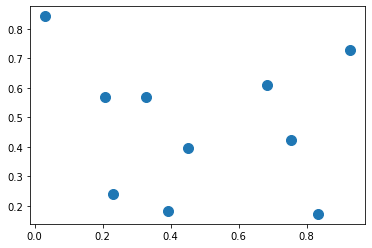

In [20]:
plt.scatter(X[:,0], X[:,1], s=100)

Now we’ll compute the distance between each pair of points. Recall that the squareddistance between two
points is the sum of the squared differences in each dimension; using the efficient broadcasting and aggregation
routines provided by NumPy, we can compute the matrix of square distances in a sin‐
gle line of code:

In [22]:
 dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

This operation has a lot packed into it, and it might be a bit confusing if you’re unfa‐
miliar with NumPy’s broadcasting rules. When you come across code like this, it can
be useful to break it down into its component steps:

In [31]:
differences = X[:, np.newaxis, :] - X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [35]:
sq_difference = differences ** 2
sq_difference.shape

(10, 10, 2)

In [38]:
dist_sq = sq_difference.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix
(i.e., the set of distances between each point and itself) is all zero:

In [39]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use np.arg
sort to sort along each row. The leftmost columns will then give the indices of the
nearest neighbors:

In [41]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 7, 5, 9, 4, 1, 2, 6, 8],
       [1, 4, 8, 7, 9, 2, 5, 3, 0, 6],
       [2, 4, 3, 7, 1, 8, 0, 9, 5, 6],
       [3, 0, 7, 9, 5, 4, 2, 1, 6, 8],
       [4, 1, 2, 7, 8, 3, 9, 0, 5, 6],
       [5, 9, 7, 6, 0, 3, 1, 4, 8, 2],
       [6, 5, 9, 7, 0, 1, 3, 4, 8, 2],
       [7, 9, 3, 0, 5, 4, 1, 2, 8, 6],
       [8, 1, 4, 2, 7, 9, 5, 3, 0, 6],
       [9, 5, 7, 0, 1, 3, 6, 4, 8, 2]], dtype=int64)

Notice that the first column gives the numbers 0 through 9 in order: this is due to the
fact that each point’s closest neighbor is itself, as we would expect. <br>

By using a full sort here, we’ve actually done more work than we need to in this case.
If we’re simply interested in the nearest k neighbors, all we need is to partition each
row so that the smallest k + 1 squared distances come first, with larger distances fill‐
ing the remaining positions of the array. We can do this with the np.argpartition
function:

In [43]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In order to visualize this network of neighbors, let’s quickly plot the points along with
lines representing the connections from each point to its two nearest neighbors


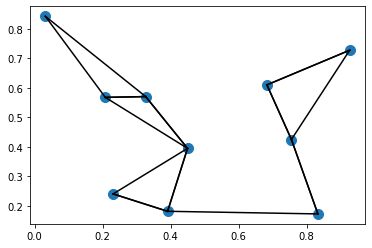

In [53]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
    # plot a line from X[i] to X[j]
    # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

In [54]:
nearest_partition[1, :K+1]

array([1, 4, 8], dtype=int64)

In [55]:
nearest_partition[2, :K+1]

array([3, 2, 4], dtype=int64)

In [57]:
np.argpartition(dist_sq, K + 1, axis=1)

array([[0, 3, 7, 5, 9, 1, 6, 2, 8, 4],
       [1, 4, 8, 7, 9, 5, 6, 3, 2, 0],
       [3, 2, 4, 7, 1, 8, 0, 6, 5, 9],
       [3, 0, 7, 9, 1, 5, 6, 2, 8, 4],
       [1, 2, 4, 7, 3, 8, 9, 6, 5, 0],
       [5, 9, 7, 6, 0, 1, 3, 2, 8, 4],
       [6, 5, 9, 7, 0, 1, 3, 2, 8, 4],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [8, 1, 4, 2, 7, 9, 6, 5, 3, 0],
       [5, 9, 7, 0, 1, 3, 6, 2, 8, 4]], dtype=int64)